In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
X = iris['data'][:,(2,3)] # petal length and width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1) # take only 2 clasess: Setosa and Versicolor

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

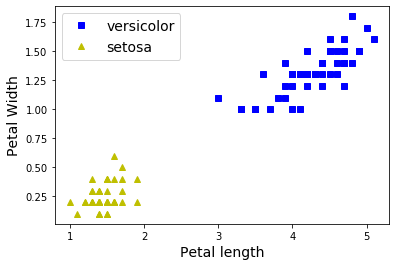

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the data we have
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='versicolor')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'y^', label ='setosa')
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale the data
C = 1 # set C( regularization hyperparameter)
m = len(X) # number of instances

In [8]:
# Define 3 classifiers that should be almost the same
linsvc = LinearSVC()
svc = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', alpha=1/(m*C))

In [9]:
# fit models defined
linsvc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
# Looking at each models coefficients
print('LinearSVC:                  ', linsvc.intercept_, linsvc.coef_)
print('SVC:                        ', svc.intercept_, svc.coef_)
print('Stochastic Gradient Descent:', sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                   [0.26071198] [[0.90015754 0.8342679 ]]
SVC:                         [0.32182521] [[1.04342638 0.94747825]]
Stochastic Gradient Descent: [0.29318521] [[1.18831106 1.03981088]]


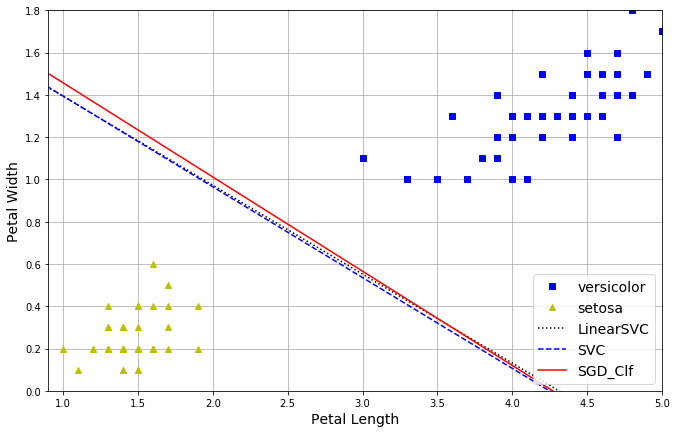

In [11]:
# Compute the slope and bias of each decision boundary
w1 = -linsvc.coef_[0,0] / linsvc.coef_[0, 1]
b1 = -linsvc.intercept_[0] / linsvc.coef_[0, 1]
w2 = -svc.coef_[0,0] / svc.coef_[0, 1]
b2 = -svc.intercept_[0] / svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0,0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

# Transform the decision boundary back to the original scale
line1 = scaler.inverse_transform([[-10, -10*w1 + b1], [10, 10*w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10*w2 + b2], [10, 10*w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10*w3 + b3], [10, 10*w3 + b3]])

# Plot the decision boundaries
plt.figure(figsize=(11, 7))
plt.plot(X[:,0][y == 1], X[:,1][y==1], 'bs', label='versicolor')
plt.plot(X[:,0][y == 0], X[:,1][y==0], 'y^', label='setosa')
plt.plot(line1[:,0], line1[:,1], 'k:', label='LinearSVC')
plt.plot(line2[:,0], line2[:,1], 'b--', label='SVC')
plt.plot(line3[:,0], line3[:,1], 'r-', label='SGD_Clf')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis([0.9,5,0,1.8])
plt.grid(axis='both')

## Classifiers are pretty close